In [0]:
import pyspark.sql.functions as F

# Read the CSV file into a DataFrame
df = spark.read.csv("/mnt/team17/forex/forex.csv", header=True, inferSchema=True)

# Cache the DataFrame for faster access
df.cache()

Out[1]: DataFrame[slug: string, date: date, open: double, high: double, low: double, close: double, currency: string]

In [0]:
df.show(10)
print(df.count())

+-------+----------+-------+-------+-------+-------+--------+
|   slug|      date|   open|   high|    low|  close|currency|
+-------+----------+-------+-------+-------+-------+--------+
|GBP/EGP|2001-04-10| 5.5809| 5.5947| 5.5947| 5.5947|     EGP|
|GBP/EGP|2001-06-04|5.47517| 5.4939| 5.4939| 5.4939|     EGP|
|GBP/EGP|2001-08-01| 5.6799| 5.6543| 5.6543| 5.6543|     EGP|
|GBP/EGP|2002-07-29|  7.217|  7.217|  7.217|  7.217|     EGP|
|GBP/EGP|2003-01-02|7.42429| 7.3899| 7.3899| 7.3899|     EGP|
|GBP/EGP|2003-04-21|9.29241|9.25045|9.25045|9.25045|     EGP|
|GBP/EGP|2004-02-13| 11.607| 11.642|  11.52| 11.578|     EGP|
|GBP/EGP|2004-02-16| 11.571| 11.623| 11.499| 11.607|     EGP|
|GBP/EGP|2004-02-17| 11.608| 11.739| 11.521| 11.662|     EGP|
|GBP/EGP|2004-02-18| 11.677| 11.772| 11.631| 11.691|     EGP|
+-------+----------+-------+-------+-------+-------+--------+
only showing top 10 rows

1453035


In [0]:
df = df.withColumn("date", F.to_date(df["date"], "M/d/yyyy"))
agg_df = df.groupBy("slug", "date").agg(
  {"open": "avg", "high": "avg", "low": "avg", "close": "avg"}
).orderBy("slug", "date")

In [0]:
import pandas as pd
pandas_df = agg_df.toPandas()
pandas_df.head()

slug 
 date 
 avg(high) 
 avg(low) 
 avg(close) 
 avg(open) 
 
 
 
 
 0 
 AUD/ARS 
 2007-05-29 
 2.5296 
 2.5205 
 2.5259 
 2.5278 
 
 
 1 
 AUD/ARS 
 2007-05-30 
 2.5344 
 2.5159 
 2.5310 
 2.5261 
 
 
 2 
 AUD/ARS 
 2007-05-31 
 2.5523 
 2.5290 
 2.5471 
 2.5308 
 
 
 3 
 AUD/ARS 
 2007-06-01 
 2.5586 
 2.5440 
 2.5544 
 2.5483 
 
 
 4 
 AUD/ARS 
 2007-06-04 
 2.5619 
 2.5376 
 2.5600 
 2.5576

/databricks/python/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


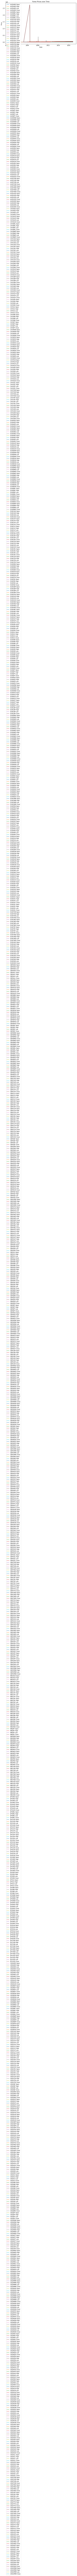

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

for currency in pandas_df["slug"].unique():
  data = pandas_df[pandas_df["slug"] == currency]
  ax.plot(data["date"], data["avg(open)"], label=f"{currency} Open")
  ax.plot(data["date"], data["avg(high)"], label=f"{currency} High")
  ax.plot(data["date"], data["avg(low)"], label=f"{currency} Low")
  ax.plot(data["date"], data["avg(close)"], label=f"{currency} Close")

ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Forex Prices over Time")

plt.show()

In [0]:
scatter_data = df.select("slug", "open", "close", "high", "low")

# Group the data by currency pair and convert to Pandas DataFrame
grouped_data = scatter_data.groupBy("slug").agg({"open": "mean", "close": "mean", "high": "mean", "low": "mean"}).toPandas()

# Plot the data as a scatter plot
display(
  grouped_data,
  x="open",
  y="close",
  title="Open vs. Close Scatter Plot"
)


slug avg(high) avg(low) avg(close) avg(open) JPY/BRL 0.028473220405862466 0.02799394870349494 0.028249769729425018 0.02821603297632463 GBP/TWD 48.95862989074499 48.250915219413 48.584442998645635 48.59357935553053 CHF/MXN 15.140418058544666 14.965566917278988 15.048338765821274 15.050513859919386 GBP/CHF 1.6633949676724138 1.6502053359913782 1.6568010905172355 1.6568744719827535 EUR/SZL 12.915160201449233 12.84942265434781 12.881085629951658 12.88162483454104 GBP/CUP 3.314205818276944 3.3058469536100414 3.2989818737356122 3.310063326124867 CHF/IDR 11152.821907108239 10958.780680933922 11033.325412639158 11050.816325783017 EUR/FJD 2.3664142262165675 2.3335825734326994 2.345782244629544 2.3469571679088137 JPY/PKR 1.2893269930786972 1.0251424175852337 1.2865717134068193 1.0273190704947461 USD/EGP 8.811383426432418 8.694922925534048 8.750417977240957 8.746478725494093 CHF/NZD 1.378726564253102 1.364670345944769 1.3717632187432076 1.3717316631876517 GBP/IDR 17485.326329469837 17024.699186980397 17206.9354681431 17191.661860351756 USD/KWD 0.2915046829908197 0.2902224114560583 0.29109416703104724 0.29087076738085077 CHF/CNY 6.7276708679903985 6.653154954178478 6.6956243469343155 6.6910087966397445 CHF/JPY 101.90094458021733 101.02234734326082 101.48470290826099 101.48086694978268 INR/PKR 2.2889874668033774 1.7980638838759293 2.2837106067674964 1.8016846354780833 EUR/PKR 125.76919855352052 124.45581974191279 153.59150382088495 124.86563839486233 AUD/CAD 0.955930681877448 0.9479494847892198 0.9519839402433725 0.9518693780964789 GBP/SCR 17.211207993117693 16.866188712778108 17.06873889171832 17.051954173204848 CHF/MYR 3.6117343255347714 3.5746879823975135 3.5930166900623988 3.592591548796794 GBP/EGP 13.663538724867733 13.475594080908301 13.584957994268077 13.57816646097886 EUR/MMK 891.5260578081354 888.0172761944123 889.3360778566741 889.7030964365979 GBP/BMD 1.4540607325335226 1.44418919689485 1.4491878394495425 1.4491701104445998 GBP/NOK 10.87653317181386 10.770479287951291 10.824556684645462 10.824224806872541 GBP/UAH 20.41808935467439 20.29859977735932 20.356475840717795 20.356565295525066 JPY/MYR 0.03552985380244756 0.035126050699300825 0.03532340581293704 0.03531758544580422 JPY/CHF 1.0069517966913373 0.9975431099259898 1.0019705104484105 1.002022128863739 GBP/XOF 779.2598968660318 777.7405945685125 778.4946830479411 778.499101281876 GBP/HUF 364.95114915356004 361.12116212276084 362.8788047236787 362.87669506312676 AUD/MYR 2.9762107719528195 2.9418723481869815 2.9593147339449564 2.9587156946264823 USD/ZMW 11.06515635720683 10.991760794091332 11.02539890734111 11.019920085049272 AUD/EUR 0.6547582206042141 0.6492913601390992 0.6520512408172128 0.6520280097804816 EUR/CRC 668.4793060347877 666.3851976112232 667.4473179438789 667.4221121762304 AUD/NOK 5.750103888125609 5.694334339548587 5.722005821393535 5.7217109313052 CHF/INR 55.91150315753868 55.32425711542657 55.61171095788786 55.58994586711751 EUR/COP 3039.7542318458195 3023.2245881469808 3031.1825055997715 3031.4087060037264 CHF/CZK 21.139696090645426 20.97990105752963 21.054517711626794 21.05568477133182 EUR/PGK 3.477685235069887 3.462249758576875 3.4696898094027953 3.4701158068615023 GBP/XPF 141.45788566686565 139.657852730391 140.53852418192653 140.6050346680586 EUR/PLN 6.223198181290075 4.147901480368608 4.168202792467938 4.168134997996789 GBP/TRY 10549.708585292732 10549.586934577726 10549.611467392098 10549.610612681567 GBP/PHP 74.42987454347359 73.83394654003183 74.11471604427622 74.1169535827025 JPY/NOK 0.11670894584139271 0.0807048123791101 0.09942745817214677 0.09004575967117998 INR/AUD 0.023001003056101338 0.022698660117878206 0.022832711198428366 0.022834273084479467 EUR/USD 1.2628831560453992 1.2529367361414232 1.2581618408991757 1.2581354048450504 EUR/BAM 1.9453061368120605 1.9449899912299513 1.9451412541108986 1.94514401666297 GBP/MOP 11.39750418395104 11.363142856851386 11.380223683100962 11.380711011900715 CHF/SEK 7.635144959310334 7.5730628413793095 7.6030905606

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
# Check most frequently traded

# Group the data by currency and count the number of currency pairs in each group
currency_counts = df.groupBy("currency").count().orderBy("count", ascending=False)
display(currency_counts)

currency count USD 46937 CNY 32490 CAD 32214 MYR 31968 HKD 31472 THB 31294 JPY 29603 GBP 28976 ZAR 28185 NOK 27999 IDR 27843 CHF 27839 KRW 27507 AUD 27063 PLN 26839 EUR 25726 CZK 25606 PKR 25177 ILS 25116 SEK 24400 TWD 23848 BRL 23747 NZD 23089 SGD 22952 DKK 22887 MXN 22382 INR 22263 HUF 21998 ARS 20174 TRY 17222 AED 16954 RUB 16409 BWP 16149 SZL 16125 SAR 13686 BGN 13578 FJD 13381 COP 13314 PHP 13186 TND 13181 UAH 13046 MWK 12978 BND 12973 KZT 12928 ETB 12883 PGK 12863 PEN 12786 MAD 12619 CLP 12192 HNL 12054 CRC 12031 IQD 11990 NIO 11974 EGP 9545 JOD 9364 KES 9236 LKR 9011 VND 8959 MUR 8959 LBP 8952 DJF 8944 KWD 8883 MKD 8530 MMK 8521 ISK 8516 QAR 8475 OMR 8296 SCR 8295 NGN 8186 BDT 8129 GTQ 8128 JMD 7984 XPF 7953 TTD 7944 BSD 7878 XOF 7534 MOP 6876 KYD 6108 BMD 5069 UYU 4601 MDL 4594 SOS 4571 BAM 4561 MGA 4408 BHD 4379 BIF 4379 DZD 4378 XAF 4358 BOB 4299 UZS 4225 UGX 4211 SVC 4201 RON 4184 SLL 4180 TZS 3981 RSD 3747 GHS 3649 SDG 3544 HTG 3528 DOP 3472 ALL 3469 IRR 3417 BBD 3304 MZN 2959 PYG 2942 BZD 2942 PAB 2941 MVR 2934 CUP 2867 BYN 2759 GMD 2363 ZMW 2234 ANG 2083

Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.window import Window

# Get unique currency values
currencies = [row['currency'] for row in df.select('currency').distinct().collect()]
df_by_currency = {}
calculated_variances = {}

# Iterate over unique currency values and filter the original DataFrame by currency
for currency in currencies:
    # Filter the DataFrame by currency and select relevant columns
    df_currency = df.filter(df.currency == currency).select('date', 'close', 'currency')

    # Calculate the return column using a window function and cache the DataFrame
    df_currency = df_currency.withColumn('return', (F.lead(F.col('close')).over(Window.partitionBy('currency').orderBy('date')) - F.col('close')) / F.col('close'))
    # Round the 'return' column to four decimal places and overwrite the existing column
    df_currency = df_currency.withColumn('return', F.round(df_currency['return'], 4))
    
    df_currency.cache()
    df_by_currency[currency] = df_currency

    # Calculate the variance of returns and store it in the calculated_variances dictionary
    calculated_variance = df_currency.select(F.variance('return')).collect()[0][0]
    # print(calculated_variance)
    calculated_variances[currency] = calculated_variance

    # Unpersist the cached DataFrame
    df_currency.unpersist()


In [0]:
# Prints a statement that displays the currency with the highest volatility and its corresponding volatility value
print(f'The currency with the highest volatility is {max(calculated_variances, key=calculated_variances.get)} with a volatility of {calculated_variances[max(calculated_variances, key=calculated_variances.get)]}.')
max_key, max_value = max(calculated_variances.items(), key=lambda x: x[1])
print("Key:", max_key)
print("Value:", max_value)

The currency with the highest volatility is IDR with a volatility of 2295599.266432772.
Key: IDR
Value: 2295599.266432772


In [0]:
import heapq

# Use heapq.nlargest to get the top 10 key-value pairs with the maximum values
top_10 = heapq.nlargest(113, calculated_variances.items(), key=lambda x: x[1])

# Iterate over the top 10 key-value pairs and print them
for key, value in top_10:
    print("Key:", key, "Value:", value)


Key: IDR Value: 2295599.266432772
Key: USD Value: 1792468.8234672335
Key: SLL Value: 1663023.3420487905
Key: PKR Value: 562057.2141101627
Key: MGA Value: 23506.30140082865
Key: RUB Value: 12816.815362598067
Key: NOK Value: 3377.8909525427885
Key: KRW Value: 2797.194254794792
Key: MYR Value: 2545.7825891894436
Key: CZK Value: 2447.9083646988393


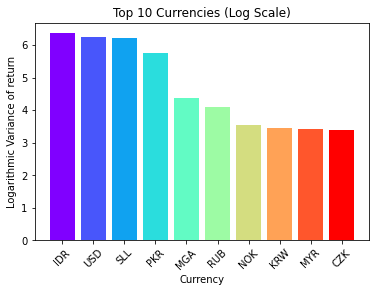

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

keys = [pair[0] for pair in top_10]
values = [pair[1] for pair in top_10]

log_values = np.log10(values)

# Create a color map
color_map = cm.get_cmap('rainbow')

# Generate an array of colors based on the number of bars
colors = color_map(np.linspace(0, 1, len(keys)))

# Create a bar chart with rainbow colors
plt.bar(keys, log_values, color=colors)

# Set labels and title
plt.xlabel('Currency')
plt.ylabel('Logarithmic Variance of return')
plt.title('Top 10 Currencies (Log Scale)')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [0]:
df_by_currency['IDR'].show(5)

+----------+-------+--------+-------+
|      date|  close|currency| return|
+----------+-------+--------+-------+
|2001-06-28|11448.0|     IDR|-0.0051|
|2001-06-29|11390.0|     IDR|-0.0061|
|2001-07-02|11320.0|     IDR| 2.0E-4|
|2001-07-03|11322.0|     IDR| 0.0038|
|2001-07-04|11365.0|     IDR|-7.0E-4|
+----------+-------+--------+-------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import first
import numpy as np

# Group the original DataFrame by currency and pivot it to create a new DataFrame with just the close prices
close_prices_df = df.groupBy('date').pivot('currency').agg(first('close'))
close_prices_df = close_prices_df.drop('date')

# Convert the close_prices_df DataFrame to a numpy array
close_prices_array = np.array(close_prices_df.select('*').collect())
close_prices_array = np.array(close_prices_array).astype(float)

# Print the type, shape, and dimension of the close_prices_array
print(type(close_prices_array), close_prices_array.shape, close_prices_array.ndim)

# Print the length of the close_prices_array
print(len(close_prices_array))

# Unpersist the original DataFrame
df.unpersist()


<class 'numpy.ndarray'> (6445, 113) 2
6445
Out[20]: DataFrame[slug: string, date: date, open: double, high: double, low: double, close: double, currency: string]

In [0]:
benchmark_currency = np.array(close_prices_df.select('IDR').collect())
benchmark_currency = np.array(benchmark_currency).astype(float)

# Remove any NaN values from benchmark_currency
benchmark_currency = benchmark_currency[np.logical_not(np.isnan(benchmark_currency))]

print(benchmark_currency)

[18627.099609 17790.       19045.       ... 18055.       10470.
  9635.      ]


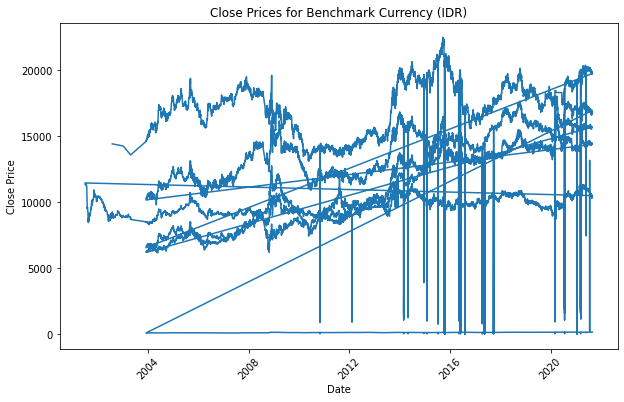

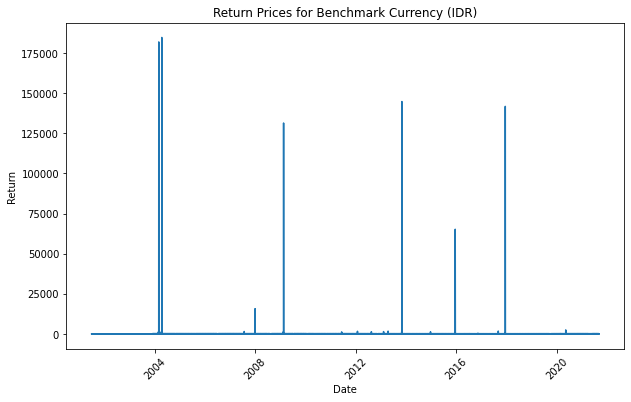

In [0]:
import matplotlib.pyplot as plt

dates = df_by_currency['IDR'].select('date').collect()
close_prices = df_by_currency['IDR'].select('close').collect()
return_prices = df_by_currency['IDR'].select('return').collect()

# Plotting the close prices
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices for Benchmark Currency (IDR)')
plt.xticks(rotation=45)
plt.show()

# Plotting the return prices
plt.figure(figsize=(10, 6))
plt.plot(dates, return_prices)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Return Prices for Benchmark Currency (IDR)')
plt.xticks(rotation=45)
plt.show()

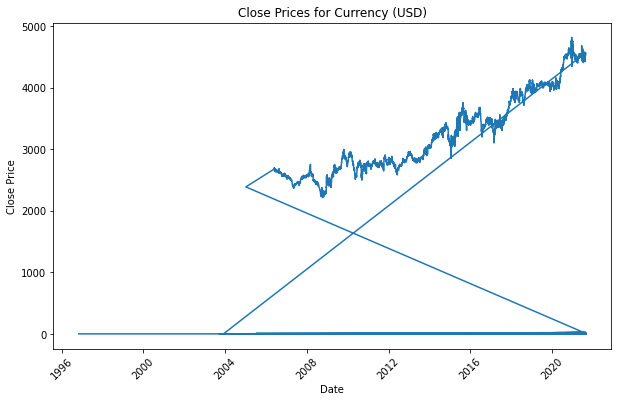

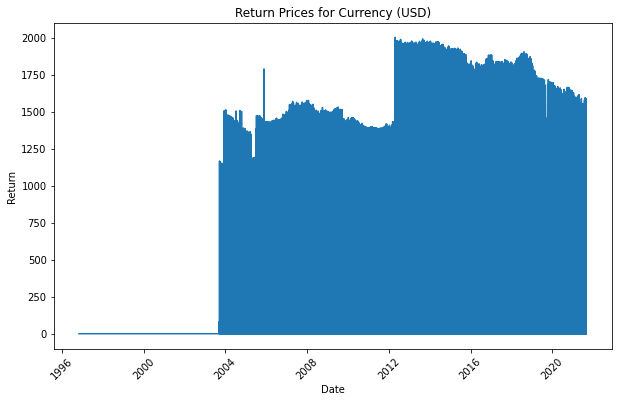

In [0]:
import matplotlib.pyplot as plt

dates = df_by_currency['USD'].select('date').collect()
close_prices = df_by_currency['USD'].select('close').collect()
return_prices = df_by_currency['USD'].select('return').collect()

# Plotting the close prices
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices for Currency (USD)')
plt.xticks(rotation=45)
plt.show()

# Plotting the return prices
plt.figure(figsize=(10, 6))
plt.plot(dates, return_prices)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Return Prices for Currency (USD)')
plt.xticks(rotation=45)
plt.show()

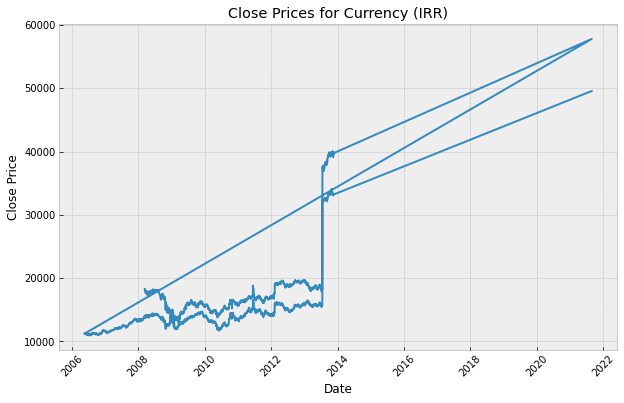

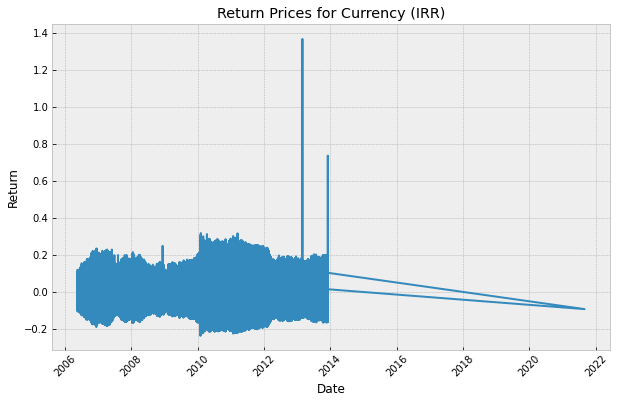

In [0]:
import matplotlib.pyplot as plt

dates = df_by_currency['IRR'].select('date').collect()
close_prices = df_by_currency['IRR'].select('close').collect()
return_prices = df_by_currency['IRR'].select('return').collect()

# Plotting the close prices
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices for Currency (IRR)')
plt.xticks(rotation=45)
plt.show()

# Plotting the return prices
plt.figure(figsize=(10, 6))
plt.plot(dates, return_prices)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Return Prices for Currency (IRR)')
plt.xticks(rotation=45)
plt.show()

In [0]:
import numpy as np

# create_cleaned_time_series takes a currency as input, retrieves the corresponding column from the close_prices_df DataFrame, removes any NaN values, and returns the cleaned numpy array representing the time series for that currency.
def create_cleaned_time_series(currency):
  comparing_currency = np.array(close_prices_df.select(currency).collect())
  comparing_currency = np.array(comparing_currency).astype(float)
  comparing_currency= comparing_currency[np.logical_not(np.isnan(comparing_currency))]
  return comparing_currency

In [0]:
# create_cleaned_df takes a currency as input, calls the create_cleaned_time_series function to obtain a cleaned numpy array for that currency, and creates a new DataFrame using the cleaned array with the currency as the column name. 
def create_cleaned_df(currency):
  cleaned_df = spark.createDataFrame(create_cleaned_time_series(currency), [currency])
  return cleaned_df

In [0]:
import sys
import collections
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import squareform

plt.style.use('bmh')
%matplotlib inline

try:
    from IPython.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False

class KnnDtw(object):
    """K-nearest neighbor classifier using dynamic time warping
    as the distance measure between pairs of time series arrays
    
    Arguments
    ---------
    n_neighbors : int, optional (default = 5)
        Number of neighbors to use by default for KNN
        
    max_warping_window : int, optional (default = infinity)
        Maximum warping window allowed by the DTW dynamic
        programming function
            
    subsample_step : int, optional (default = 1)
        Step size for the timeseries array. By setting subsample_step = 2,
        the timeseries length will be reduced by 50% because every second
        item is skipped. Implemented by x[:, ::subsample_step]
    """
    
    def __init__(self, n_neighbors=5, max_warping_window=10000, subsample_step=1):
        self.n_neighbors = n_neighbors
        self.max_warping_window = max_warping_window
        self.subsample_step = subsample_step
    
    def fit(self, x, l):
        """Fit the model using x as training data and l as class labels
        
        Arguments
        ---------
        x : array of shape [n_samples, n_timepoints]
            Training data set for input into KNN classifer
            
        l : array of shape [n_samples]
            Training labels for input into KNN classifier
        """
        
        self.x = x
        self.l = l
        
    def _dtw_distance(self, ts_a, ts_b, d = lambda x,y: abs(x-y)):
        """Returns the DTW similarity distance between two 2-D
        timeseries numpy arrays.

        Arguments
        ---------
        ts_a, ts_b : array of shape [n_samples, n_timepoints]
            Two arrays containing n_samples of timeseries data
            whose DTW distance between each sample of A and B
            will be compared
        
        d : DistanceMetric object (default = abs(x-y))
            the distance measure used for A_i - B_j in the
            DTW dynamic programming function
        
        Returns
        -------
        DTW distance between A and B
        """

        # Create cost matrix via broadcasting with large int
        ts_a, ts_b = np.array(ts_a), np.array(ts_b)
        M, N = len(ts_a), len(ts_b)
        cost = sys.maxsize * np.ones((M, N))

        # Initialize the first row and column
        cost[0, 0] = d(ts_a[0], ts_b[0])
        for i in range(1, M):
            cost[i, 0] = cost[i-1, 0] + d(ts_a[i], ts_b[0])

        for j in range(1, N):
            cost[0, j] = cost[0, j-1] + d(ts_a[0], ts_b[j])

        # Populate rest of cost matrix within window
        for i in range(1, M):
            for j in range(max(1, i - self.max_warping_window),
                            min(N, i + self.max_warping_window)):
                choices = cost[i - 1, j - 1], cost[i, j-1], cost[i-1, j]
                cost[i, j] = min(choices) + d(ts_a[i], ts_b[j])

        # Return DTW distance given window 
        return cost[-1, -1]
    
    def _dist_matrix(self, x, y):
        """Computes the M x N distance matrix between the training
        dataset and testing dataset (y) using the DTW distance measure
        
        Arguments
        ---------
        x : array of shape [n_samples, n_timepoints]
        
        y : array of shape [n_samples, n_timepoints]
        
        Returns
        -------
        Distance matrix between each item of x and y with
            shape [training_n_samples, testing_n_samples]
        """
        
        # Compute the distance matrix        
        dm_count = 0
        
        # Compute condensed distance matrix (upper triangle) of pairwise dtw distances
        # when x and y are the same array
        if(np.array_equal(x, y)):
            x_s = np.shape(x)
            dm = np.zeros((x_s[0] * (x_s[0] - 1)) // 2, dtype=np.double)
            
            p = ProgressBar(shape(dm)[0])
            
            for i in range(0, x_s[0] - 1):
                for j in range(i + 1, x_s[0]):
                    dm[dm_count] = self._dtw_distance(x[i, ::self.subsample_step],
                                                      y[j, ::self.subsample_step])
                    
                    dm_count += 1
                    p.animate(dm_count)
            
            # Convert to squareform
            dm = squareform(dm)
            return dm
        
        # Compute full distance matrix of dtw distnces between x and y
        else:
            x_s = np.shape(x)
            y_s = np.shape(y)
            dm = np.zeros((x_s[0], y_s[0])) 
            dm_size = x_s[0]*y_s[0]
            
            p = ProgressBar(dm_size)
        
            for i in range(0, x_s[0]):
                for j in range(0, y_s[0]):
                    dm[i, j] = self._dtw_distance(x[i, ::self.subsample_step],
                                                  y[j, ::self.subsample_step])
                    # Update progress bar
                    dm_count += 1
                    p.animate(dm_count)
        
            return dm
        
    def predict(self, x):
        """Predict the class labels or probability estimates for 
        the provided data

        Arguments
        ---------
          x : array of shape [n_samples, n_timepoints]
              Array containing the testing data set to be classified
          
        Returns
        -------
          2 arrays representing:
              (1) the predicted class labels 
              (2) the knn label count probability
        """
        
        dm = self._dist_matrix(x, self.x)

        # Identify the k nearest neighbors
        knn_idx = dm.argsort()[:, :self.n_neighbors]

        # Identify k nearest labels
        knn_labels = self.l[knn_idx]
        
        # Model Label
        mode_data = mode(knn_labels, axis=1)
        mode_label = mode_data[0]
        mode_proba = mode_data[1]/self.n_neighbors

        return mode_label.ravel(), mode_proba.ravel()

class ProgressBar:
    """This progress bar was taken from PYMC
    """
    def __init__(self, iterations):
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 40
        self.__update_amount(0)
        if have_ipython:
            self.animate = self.animate_ipython
        else:
            self.animate = self.animate_noipython

    def animate_ipython(self, iter):
        print ('\r'), self,
        sys.stdout.flush()
        self.update_iteration(iter + 1)

    def update_iteration(self, elapsed_iter):
        self.__update_amount((elapsed_iter / float(self.iterations)) * 100.0)
        self.prog_bar += '  %d of %s complete' % (elapsed_iter, self.iterations)

    def __update_amount(self, new_amount):
        percent_done = int(round((new_amount / 100.0) * 100.0))
        all_full = self.width - 2
        num_hashes = int(round((percent_done / 100.0) * all_full))
        self.prog_bar = '[' + self.fill_char * num_hashes + ' ' * (all_full - num_hashes) + ']'
        pct_place = (len(self.prog_bar) // 2) - len(str(percent_done))
        pct_string = '%d%%' % percent_done
        self.prog_bar = self.prog_bar[0:pct_place] + \
            (pct_string + self.prog_bar[pct_place + len(pct_string):])

    def __str__(self):
        return str(self.prog_bar)

In [0]:
m = KnnDtw()
distance_dictionary = {}

# Calculate the DTW distance between benchmark_currency and each currency's time series
for currency in close_prices_df.columns:
    if currency != 'IDR':
        distance = m._dtw_distance(benchmark_currency, create_cleaned_time_series(currency))
        distance_dictionary[currency] = distance

# Find the currency most associated with the benchmark currency based on the minimum DTW distance
associated_currency = min(distance_dictionary, key=distance_dictionary.get)
min_distance = min(distance_dictionary.values())

print('Currency most associated with the benchmark currency is %s' % associated_currency)
print('DTW distance between benchmark currency and currency with the least distance is %.2f' % min_distance)

Currency most associated with the benchmark currency is IRR
DTW distance between benchmark currency and currency with the least distance is 9474324.64


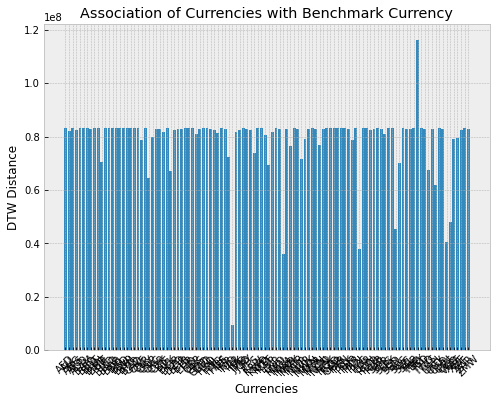

In [0]:
import matplotlib.pyplot as plt

# Assuming you have the calculated distances and associated currencies in the distance_dictionary
distances = list(distance_dictionary.values())
currencies = list(distance_dictionary.keys())

# Plotting the distances
plt.figure(figsize=(8, 6))
plt.bar(currencies, distances)
plt.xlabel('Currencies')
plt.ylabel('DTW Distance')
plt.title('Association of Currencies with Benchmark Currency')
plt.xticks(rotation=45)
plt.show()

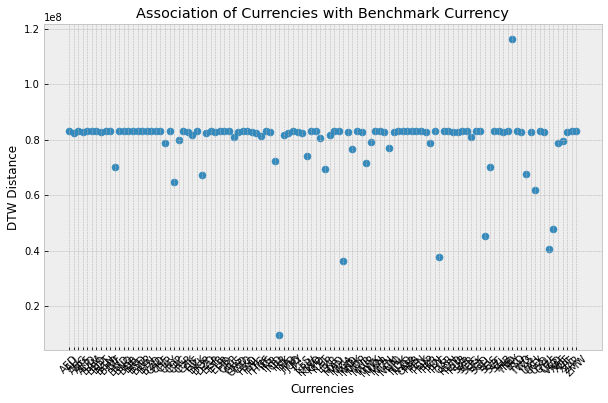

In [0]:
# Plotting the distances as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(currencies, distances, marker='o', s=50)
plt.xlabel('Currencies')
plt.ylabel('DTW Distance')
plt.title('Association of Currencies with Benchmark Currency')
plt.xticks(rotation=45)
plt.show()


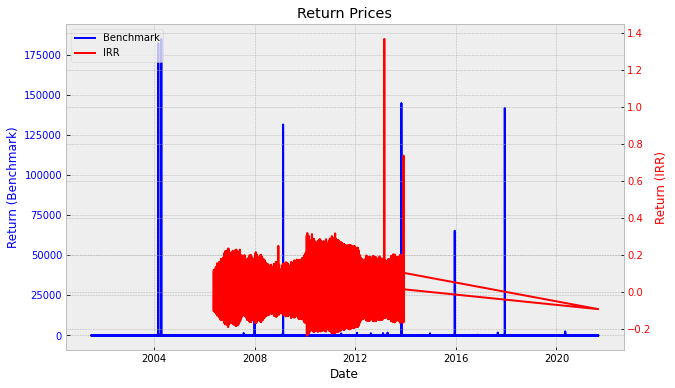

In [0]:
benchmark_dates = df_by_currency['IDR'].select('date').collect()
benchmark_close_prices = df_by_currency['IDR'].select('close').collect()
benchmark_return_prices = df_by_currency['IDR'].select('return').collect()

closest_asociated_dates = df_by_currency[associated_currency].select('date').collect()
closest_asociated_return_prices = df_by_currency[associated_currency].select('return').collect()

# Plotting the close prices
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the benchmark currency
ax1.plot(benchmark_dates, benchmark_return_prices, label='Benchmark', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Return (Benchmark)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the associated currency
ax2 = ax1.twinx()
ax2.plot(closest_asociated_dates, closest_asociated_return_prices, label=associated_currency, color='red')
ax2.set_ylabel('Return ({})'.format(associated_currency), color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding legend for both currencies
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Setting the title
plt.title('Return Prices')

plt.xticks(rotation=45)
plt.show()

In [0]:
from pyspark.sql import *
from pyspark.sql.types import StructType, StructField, ArrayType, FloatType

# Define the schema for the DataFrame
schema = StructType([
    StructField("close_price", ArrayType(FloatType()), True)
])

# Create a parallelized collection of Row objects
data = [Row(close_price=[float(val) for val in create_cleaned_time_series(currency)]) for currency in close_prices_df.columns]


# Create a Spark DataFrame from the parallelized collection of Rows and schema
df = spark.createDataFrame(data, schema)
df.limit(5).toPandas()

close_price 
 
 
 
 
 0 
 [4.801499843597412, 5.7393999099731445, 5.8447... 
 
 
 1 
 [141.3800048828125, 163.19000244140625, 174.63... 
 
 
 2 
 [2.194700002670288, 2.270400047302246, 2.08279... 
 
 
 3 
 [50.654998779296875, 7.508399963378906, 10.609... 
 
 
 4 
 [1.8644599914550781, 1.7000999450683594, 1.828...

In [0]:
close_price_rdd = df.rdd.map(lambda row: ([row["close_price"][i:i+3] for i in range(0, len(row["close_price"]), 3)]))
sequence_df = close_price_rdd.toDF(["sequence"])
# print(sequence_rdd.collect())
df = spark.createDataFrame(close_price_rdd, ArrayType(ArrayType(FloatType())))
print(df.collect())
df.show()

[Row(value=[[4.801499843597412, 5.7393999099731445, 5.844799995422363], [5.523900032043457, 6.911200046539307, 5.749300003051758], [5.83489990234375, 5.812399864196777, 4.763999938964844], [5.571400165557861, 4.651299953460693, 5.602200031280518], [6.698599815368652, 4.847599983215332, 5.114699840545654], [5.80049991607666, 4.807170867919922, 5.994699954986572], [5.030789852142334, 4.887499809265137, 7.5524001121521], [7.502399921417236, 5.117691993713379, 5.043745994567871], [4.71019983291626, 7.358799934387207, 7.355500221252441], [5.600399971008301, 6.768099784851074, 4.748781204223633], [6.024899959564209, 5.736800193786621, 5.922399997711182], [5.759799957275391, 4.6149001121521, 5.291200160980225], [4.557499885559082, 4.6781110763549805, 4.426000118255615], [4.923799991607666, 7.361999988555908, 4.740149974822998], [4.557300090789795, 6.017600059509277, 4.798129081726074], [5.668799877166748, 4.776814937591553, 4.772900104522705], [5.797800064086914, 7.271299839019775, 4.58039188

In [0]:
import pyspark.sql.functions as F
from pyspark.sql.functions import avg
from pyspark.sql.window import Window

# Define the window specification
window_spec = Window.orderBy('date').rowsBetween(-2, 0)

# Calculate the moving average over the window of 3 rows
df_with_3day_avg = df.withColumn('sequence', df.groupBy('date').over(window_spec))


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-3565681090071754>:9
      6 window_spec = Window.orderBy('date').rowsBetween(-2, 0)
      8 # Calculate the moving average over the window of 3 rows
----> 9 df_with_3day_avg = df.withColumn('sequence', df.groupBy('date').over(window_spec))

AttributeError: 'GroupedData' object has no attribute 'over'

In [0]:
from pyspark.ml.fpm import PrefixSpan
# Define the PrefixSpan model
prefixSpan = PrefixSpan(
    minSupport=0.5,
    maxPatternLength=5,
    maxLocalProjDBSize=320000,
    sequenceCol='value'
)

# Find frequent sequential patterns for each currency
prefixSpan.findFrequentSequentialPatterns(df).show()

+--------+----+
|sequence|freq|
+--------+----+
+--------+----+

